# Black Hole Spin Comparisons
##  Manipulation of the data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## input data

In [2]:
import numpy as np
name=['1H0707-495', '1H 0419-577', 'GROJ1655-40', 'GROJ1655-40','GROJ1655-40','GROJ1655-40', 'GROJ1655-40','GROJ1655-40', "GRS1915+105", "GRS1915+105", 
      "GRS1915+105", "GRS1915+105","XTEJ1550-564","XTEJ1550-564","XTEJ1550-564","XTEJ1550-564","CYG X-1","CYG X-1","CYG X-1","XTEJ1650-500", 
      "MCG 06-30-15","MCG 06-30-15", "Mrk 766","H 1743-322", "H 1743-322"]
mass=[5.2*10**6,340*10**6,6.3,6.3,6.3,6.3,6.3,6.3,10.1,12.5,10.1,12.5,9.1,9.1,9.1,9.1,14.8,14.8,14.8,5, 2.9*10**6, 3.26*10**6, 4*10**6, 11.21, 13.3]
masserr=[[3162277,113333333,.5,.5,.5,.5,.5,.5,0.6,1.9,0.6,1.9,0.6,0.6,0.6,0.6,1,1,1,2, 1.6*10**6, 1.40*10**6, 1.5*10**6, 1.96,3.2],
         [3162277,113333333,.5,.5,.5,.5,.5,.5,0.6,1.9,0.6,1.9,0.6,0.6,0.6,0.6,1,1,1,2, 1.8*10**6, 1.59*10**6, 3*10**6, 1.65,3.2]]
spin=[0.976,0.89,0.7,.95,.98,0.7,.95,.98,.555,.98,.555,.98,.515,.76,.515,.76,.795,.86,.915,.79, 0.97, .97, .92, .2,.2]
spinerr=[[.006,0,.05,.05,.01,.05,.05,.01,.025,.01,.025,.01,.185,.01,.185,.01,.195,.09,.085,.01, .015, .015, 0, .3,.3],
         [.024,.11,.05,.05,.01,.05,.05,.01,.025,.01,.025,.01,.185,.01,.185,.01,.195,.09,.085,.01, .03, .03, .08, .3,.3]]
freq=[2.6*10**-4, 2*10**-6,300,300,300,450,450,450,113,67,67,113,184,276,276,184,135,135,135,250, 2.73*10**-4, 2.73*10**-4, 1.55*10**-4, 166, 166]
methodspin=[0,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,0,1,0,0,0,1,1]
color=['b','cyan','m','m','m','m','m','m','y','y','y','y','brown','brown','brown','brown','darkorange','orange','darkorange','g', 'slategrey', 'slategrey', 'orchid','red', 'red']
##iron method=0, continuum method=1

### mass*frequency

In [3]:
# calculate mass*frequency
massfreq=[]
for i in range(len(mass)):
    massfreq.append(mass[i]/10*freq[i])

### determination of spin

In [4]:
shape=[]
method=[]
for i in range(len(methodspin)):
    if methodspin[i]==0:
        shape.append("s")
        method.append('Continuum Method')
    else:
        shape.append("<")
        method.append('Iron Line Method')

### Constants

In [5]:
G=6.67*10**-11
c=299792458
Msun=1.989*10**30

## BH Spin Comparisons

### G-Mode

In [34]:
def FunGMode():
    r=np.arange(2.5, 8.1, 0.1,  dtype=np.complex)
    #r=2.5
    a2=(r**.5)*(5*r-4)/2
    a1=r*(1-6*r)
    a0=r**(2.5)*(8-r)/2
    Q=1/3*a1-1/9*a2**2
    R=1/6*(a1*a2-3*a0)-(1/27)*a2**3
    check=Q**3+R**2
    ##(Q**3+r**2)<0 so all roots are real
    S1=(R+(check)**(1/2))**(1/3)
    S2=(R-(check)**(1/2))**(1/3)
    Z1=(S1+S2)-(a2/3)
    Z2=(-1/2)*(S1+S2)-(a2/3)+(3**(1/2)*1j/2)*(S1-S2)
    a=(-1/2)*(S1+S2)-(a2/3)-(3**(1/2)*1j/2)*(S1-S2)
    ## Z3 is correct root

    alphar=1-6*r**-1+8*a*r**(-3/2)-3*a**2*r**(-2)

    gmode=(alphar**(1/2)*(c**3/(G*Msun))*(r**(3/2)+a)**-1*(1/(20*np.pi)))

    #0<L/Ledd<.5
    L=.5
    E=.1*L
    lowerbound=gmode*(1-E)
    
    return gmode, lowerbound, a

### 3:2 Resonance Theory

In [30]:
def Fun32():
    r=np.arange(49/5-4*(11/5)**(1/2),10.8,.1)
    a=(1/39)*(44*(r)**(1/2)-(5)**(.5)*(r*(39*r-34))**(1/2))

    alphar=1-6*r**-1+8*a*r**(-3/2)-3*a**2*r**(-2)
    alphath=1-4*a*r**(-3/2)+3*a**2*r**(-2)

    radial=(alphar**(1/2)*(c**3/(G*Msun))*(r**(3/2)+a)**-1*(1/(20*np.pi)))

    vertical=((alphath)**(1/2)*(c**3/(G*Msun))*(r**(3/2)+a)**-1*(1/(20*np.pi)))
    
    return radial, vertical, a

### ISCO

In [39]:
def FunISCO():
    r=np.arange(1, 6, 0.1)
    a=((-1/6)*r**2*(-8/r**(3/2)+(64/(r**3)+(12*(1-6/r))/(r**2))**(.5)))
    ISCO=((r**(3/2)+a)**(-1)*(1/(2*np.pi))*(c**3/(10*Msun*G)))
    return ISCO, a

### BH Angular Frequency

In [46]:
def FunAngFreq():
    a=np.arange(0, .998, 0.01)
    angfreq=(c*a)/((Msun)*(G/c**2)*(160*np.pi*(1+(1-a**2)**.5)))
    return angfreq, a

## Plots

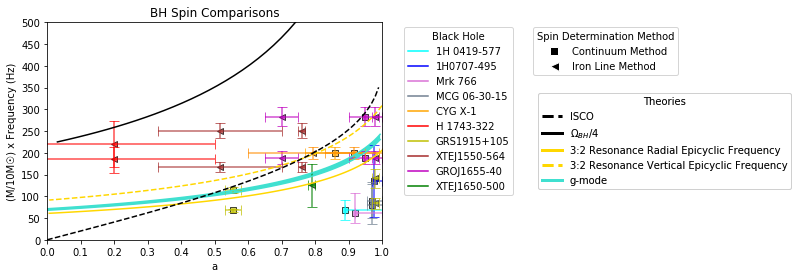

In [51]:
# plot title and labels
plt.title('BH Spin Comparisons')
plt.xlabel('a')
plt.ylabel('(M/10M☉) x Frequency (Hz)')

#plot data
for i in range(len(spin)):
    plt.scatter(spin[i], massfreq[i], marker=shape[i], color=color[i], edgecolors='k', norm=.5, alpha=.7)

#errorbars
for i in range(len(spin)):
    plt.errorbar(spin[i], massfreq[i], yerr=[[masserr[0][i]*freq[i]/10], [masserr[1][i]*freq[i]/10]], xerr=[[spinerr[0][i]],[spinerr[1][i]]], 
                 ecolor=color[i], ls='none', barsabove=False, capsize=5, alpha=.7 )   

# plot dimensions
plt.axis([0, 1, 0, 500])
xtix=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xticks(xtix, xtix)
ytix=[0, 50, 100, 150, 200,250, 300, 350, 400, 450,500]
plt.yticks(ytix, ytix)

# plot gmode
gmode, lowerbound, a = FunGMode()
plt.fill_between(a, lowerbound,gmode, facecolor='turquoise')
plt.plot(a, gmode, 'turquoise')
plt.plot(a, lowerbound, 'turquoise')

# plot 3:2 resonance theory
radial, vertical, a = Fun32()
plt.plot(a, radial, 'gold')
plt.plot(a, vertical, 'gold', ls='--')

# plot ISCO
ISCO, a = FunISCO()
plt.plot(a, ISCO, 'k')

# plot BH angular frequency
angfreq, a = FunAngFreq()
plt.plot(a, angfreq, 'k--')


#legends
legend_elements = [Line2D([0], [0], marker='s', color='w', label='Continuum Method', markerfacecolor='k', markersize=8), 
                   Line2D([0], [0], marker='<', color='w', label='Iron Line Method', markerfacecolor='k', markersize=9)]
legend2=plt.legend(handles=legend_elements, title="Spin Determination Method",  bbox_to_anchor=(1.9, 1))
plt.gca().add_artist(legend2)

legend_elements2= [Line2D([0], [0], color='cyan', label='1H 0419-577'),Line2D([0], [0], color='b', label='1H0707-495'),
                   Line2D([0], [0], color='orchid', label='Mrk 766'), Line2D([0], [0], color='slategrey', label='MCG 06-30-15'),
                   Line2D([0], [0], color='orange', label='CYG X-1'), Line2D([0], [0], color='red', label='H 1743-322'),
                   Line2D([0], [0], color='y', label='GRS1915+105'), Line2D([0], [0], color='brown', label='XTEJ1550-564'),
                   Line2D([0], [0], color='m', label='GROJ1655-40'), Line2D([0], [0], color='g', label='XTEJ1650-500')]
legend2=plt.legend(handles=legend_elements2, title="Black Hole",  bbox_to_anchor=(1.05, 1))
plt.gca().add_artist(legend2)


legend_elements3= [Line2D([0], [0], color='k', ls='--', label='ISCO', lw=3), Line2D([0], [0], color='k', label='$\Omega_{BH}$/4', lw=3),
                  Line2D([0], [0], color='gold', label='3:2 Resonance Radial Epicyclic Frequency', lw=3), 
                Line2D([0], [0], color='gold', ls='--', label='3:2 Resonance Vertical Epicyclic Frequency', lw=3),
                  Line2D([0], [0], color='turquoise', label='g-mode', lw=3)]
legend3=plt.legend(handles=legend_elements3, title="Theories",  bbox_to_anchor=(1.45, .7))
plt.gca().add_artist(legend3)


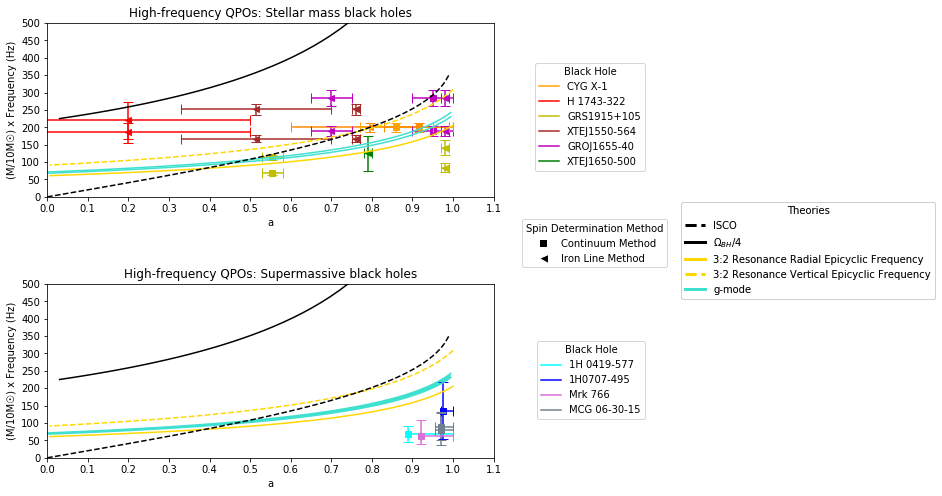

In [54]:
# creates 2 subplots
f, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

# plot titles and labels
ax1.set_xlabel('a')
ax1.set_ylabel('(M/10M☉) x Frequency (Hz)')   
ax2.set_xlabel('a')
ax2.set_ylabel('(M/10M☉) x Frequency (Hz)') 

ax1.set_title('High-frequency QPOs: Stellar mass black holes')
ax2.set_title('High-frequency QPOs: Supermassive black holes')

ax1.set_xlim([0, 1])
ax1.set_ylim([0, 500])
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 500])

# plot data
for i in range(len(mass)):
    x=mass[i]
    if x <100:
        ax1.plot(spin[i], massfreq[i], marker=shape[i], color=color[i])
        ax1.errorbar(spin[i], massfreq[i], yerr=[[masserr[0][i]*freq[i]/10], [masserr[1][i]*freq[i]/10]], xerr=[[spinerr[0][i]],[spinerr[1][i]]], 
                 ecolor=color[i], ls='none', barsabove=False, capsize=5 ) 
    else:
        ax2.plot(spin[i], massfreq[i], marker=shape[i], color=color[i])
        ax2.errorbar(spin[i], massfreq[i], yerr=[[masserr[0][i]*freq[i]/10], [masserr[1][i]*freq[i]/10]], xerr=[[spinerr[0][i]],[spinerr[1][i]]], 
                 ecolor=color[i], ls='none', barsabove=False, capsize=5 ) 
        
# plot gmode
gmode, lowerbound, a = FunGMode()
plt.fill_between(a, lowerbound,gmode, facecolor='turquoise')
ax1.plot(a, gmode, 'turquoise')
ax1.plot(a, lowerbound, 'turquoise')
ax2.plot(a, gmode, 'turquoise')
ax2.plot(a, lowerbound, 'turquoise')

# plot 3:2 resonance theory
radial, vertical, a = Fun32()
ax1.plot(a, radial, 'gold')
ax1.plot(a, vertical, 'gold', ls='--')
ax2.plot(a, radial, 'gold')
ax2.plot(a, vertical, 'gold', ls='--')

# plot ISCO
ISCO, a = FunISCO()
ax1.plot(a, ISCO, 'k')
ax2.plot(a, ISCO, 'k')

# plot BH angular frequency
angfreq, a = FunAngFreq()
ax1.plot(a, angfreq, 'k--')
ax2.plot(a, angfreq, 'k--')

#legends
legend_elements = [Line2D([0], [0], marker='s', color='w', label='Continuum Method', markerfacecolor='k', markersize=8), 
                   Line2D([0], [0], marker='<', color='w', label='Iron Line Method', markerfacecolor='k', markersize=9)]
legend2=plt.legend(handles=legend_elements, title="Spin Determination Method",  bbox_to_anchor=(1.4, 1.4))
plt.gca().add_artist(legend2)

legend_elements2= [Line2D([0], [0], color='cyan', label='1H 0419-577'),Line2D([0], [0], color='b', label='1H0707-495'),
                   Line2D([0], [0], color='orchid', label='Mrk 766'), Line2D([0], [0], color='slategrey', label='MCG 06-30-15')]

legend2=plt.legend(handles=legend_elements2, title="Black Hole",  bbox_to_anchor=(1.35, .7))
plt.gca().add_artist(legend2)

legend_elements3=[Line2D([0], [0], color='orange', label='CYG X-1'), Line2D([0], [0], color='red', label='H 1743-322'),
                   Line2D([0], [0], color='y', label='GRS1915+105'), Line2D([0], [0], color='brown', label='XTEJ1550-564'),
                   Line2D([0], [0], color='m', label='GROJ1655-40'), Line2D([0], [0], color='g', label='XTEJ1650-500')]

legend3=plt.legend(handles=legend_elements3, title="Black Hole",  bbox_to_anchor=(1.35, 2.3))
plt.gca().add_artist(legend3)

legend_elements4= [Line2D([0], [0], color='k', ls='--', label='ISCO', lw=3), Line2D([0], [0], color='k', label='$\Omega_{BH}$/4', lw=3),
                  Line2D([0], [0], color='gold', label='3:2 Resonance Radial Epicyclic Frequency', lw=3), 
                Line2D([0], [0], color='gold', ls='--', label='3:2 Resonance Vertical Epicyclic Frequency', lw=3),
                  Line2D([0], [0], color='turquoise', label='g-mode', lw=3)]
legend4=plt.legend(handles=legend_elements4, title="Theories",  bbox_to_anchor=(2, 1.5))
plt.gca().add_artist(legend4)

plt.setp((ax1, ax2), xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 1.1], yticks=[0, 50, 100, 150, 200,250, 300, 350, 400, 450,500])

plt.show()

## Table

In [55]:
# makes superscripts and subscripts

def to_sup(number):
    num = str(number)
    newstr = ""

    for i in range(len(num)):
        if num[i] == "0":
            newstr = newstr + chr(0x2070)
        if num[i] == "1":
            newstr = newstr + chr(0x00B9)
        if num[i] == "2":
            newstr = newstr + chr(0x00B2)
        if num[i] == "3":
            newstr = newstr + chr(0x00B3)
        if num[i] == "4":
            newstr = newstr + chr(0x2074)
        if num[i] == "5":
            newstr = newstr + chr(0x2075)
        if num[i] == "6":
            newstr = newstr + chr(0x2076)
        if num[i] == "7":
            newstr = newstr + chr(0x2077)
        if num[i] == "8":
            newstr = newstr + chr(0x2078)
        if num[i] == "9":
            newstr = newstr + chr(0x2079)
        if num[i] == ".":
            newstr = newstr +chr(0x1427)
    return newstr
            
def to_sub(number):
    num = str(number)
    newstr = ""
    for i in range(len(num)):
        if num[i] == "0":
            newstr = newstr + chr(0x2080)
        if num[i] == "1":
            newstr = newstr + chr(0x2081)
        if num[i] == "2":
            newstr = newstr + chr(0x2082)
        if num[i] == "3":
            newstr = newstr + chr(0x2083)
        if num[i] == "4":
            newstr = newstr + chr(0x2084)
        if num[i] == "5":
            newstr = newstr + chr(0x2085)
        if num[i] == "6":
            newstr = newstr + chr(0x2086)
        if num[i] == "7":
            newstr = newstr + chr(0x2087)
        if num[i] == "8":
            newstr = newstr + chr(0x2088)
        if num[i] == "9":
            newstr = newstr + chr(0x2089)
        if num[i] == ".":
            newstr = newstr + r'$_.$'
    return newstr

In [61]:
# add error bars to mass

masse=[]

for i in range(len(mass)):
    m=mass[i]
    up=masserr[1][i]
    down=masserr[0][i]
    masse.append(str(m)+ chr(0x208B) + to_sub(down) + chr(0x207A) + to_sup(up))

# add error bars to spin
    
spine=[]

for i in range(len(spin)):
    s=spin[i]
    up=spinerr[1][i]
    down=spinerr[0][i]
    spine.append(str(s)+ chr(0x208B) + to_sub(down) + chr(0x207A) + to_sup(up))

In [63]:
# adds references for each BH

ref1H0707495=[['A. Zoghbi, A. C. Fabian, P. Uttley, G. Miniutti, L. C. Gallo, C. S. Reynolds, J. M. Miller, G. Ponti, 2010, 4, 2419–243'],
              ['arXiv:1302.3260'], ['arXiv:1601.07']]
ref1H0419577=[['arXiv:1302.3260'],['arXiv:1302.3260']]
refGROJ165540=[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'],['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'],['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]
refGRS1915105=[['Chang-Yin Huang et al 2013 Res. Astron. Astrophys. 13 705'],
               ['Blum, J.L. et al. (2009) Ap.J. 706, 60-66.'],
                ['Miller, J.M. et al. (2013) Ap.J. 775, L45'],
               ['McClintock, J.E. et al. (2006) Ap.J. 652, 518']]
refXTEJ1550564=[['arXiv:1302.3260'],['Steiner, J.F. et al. (2011) MNRAS 416, 941'],
                ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]
refCYGX1=[['Gou, L. et al. (2011) Ap.J. 742, 85'],
          ['Miller, J.M. et al. (2012) Ap.J. 757, 11'],
          ['Fabian, A.C. et al. (2012) MNRAS 424, 217'],
          ['Duro, R. et al. (2011) A&A 533, L3']
         ,['arXiv:1310.3830']]
refXTEJ1650500=['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']
refMCG063015=[['Brenneman and Reynolds 2006'],
              ['I. M. McHardy, K. F. Gunn, P. Uttley, M. R. Goad, Royal Astronomical Society, 359, 4, 2005'],
              ['A. Gupta1, A. Tripathi, P. Wiita, M. Gu1, C. Bambi, L. Ho, 2018']]
refMrk766=[['Zhou et al. 2010'],['arXiv:1808.00014'],['arXiv:1707.03586v2']]
refH1743322=[['Remillard, R. et al. (2006) Ap.J. 637, 1002'],['Steiner, J.F., McClintock, J.E. & Reid, M.J. (2012) Ap.J. 745, L7'],
             ['Shaposhnikov & Titarchuk (2007)'],['A. Molla, S. Chakrabarti, D. Debnath, S. Mondal (2017)']]

ref=[ref1H0707495,ref1H0419577,refGROJ165540,refGROJ165540,refGROJ165540,refGROJ165540,refGROJ165540,refGROJ165540,
     refGRS1915105,refGRS1915105, refGRS1915105,refGRS1915105,refXTEJ1550564,refXTEJ1550564,
     refXTEJ1550564,refXTEJ1550564,refCYGX1,refCYGX1,refCYGX1,refXTEJ1650500,
     refMCG063015,refMCG063015,refMrk766,refH1743322,refH1743322]

In [64]:
#plot table

import sys
from astropy.table import Table

t = Table([name, masse, freq, spine, method, ref], 
          names=('Black Hole', 'Mass (M☉)', 'Frequency (Hz)', 'Spin', 'Spin Determination Method', 'References'))

t.show_in_notebook()

idx,Black Hole,Mass (M☉),Frequency (Hz),Spin,Spin Determination Method,References
0,1H0707-495,5200000.0₋₃₁₆₂₂₇₇⁺³¹⁶²²⁷⁷,0.00026000000000000003,0.976₋₀$_.$₀₀₆⁺⁰ᐧ⁰²⁴,Continuum Method,"[['A. Zoghbi, A. C. Fabian, P. Uttley, G. Miniutti, L. C. Gallo, C. S. Reynolds, J. M. Miller, G. Ponti, 2010, 4, 2419–243'], ['arXiv:1302.3260'], ['arXiv:1601.07']]"
1,1H 0419-577,340000000₋₁₁₃₃₃₃₃₃₃⁺¹¹³³³³³³³,2e-06,0.89₋₀⁺⁰ᐧ¹¹,Continuum Method,"[['arXiv:1302.3260'], ['arXiv:1302.3260']]"
2,GROJ1655-40,6.3₋₀$_.$₅⁺⁰ᐧ⁵,300.0,0.7₋₀$_.$₀₅⁺⁰ᐧ⁰⁵,Iron Line Method,"[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'], ['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'], ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]"
3,GROJ1655-40,6.3₋₀$_.$₅⁺⁰ᐧ⁵,300.0,0.95₋₀$_.$₀₅⁺⁰ᐧ⁰⁵,Continuum Method,"[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'], ['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'], ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]"
4,GROJ1655-40,6.3₋₀$_.$₅⁺⁰ᐧ⁵,300.0,0.98₋₀$_.$₀₁⁺⁰ᐧ⁰¹,Iron Line Method,"[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'], ['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'], ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]"
5,GROJ1655-40,6.3₋₀$_.$₅⁺⁰ᐧ⁵,450.0,0.7₋₀$_.$₀₅⁺⁰ᐧ⁰⁵,Iron Line Method,"[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'], ['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'], ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]"
6,GROJ1655-40,6.3₋₀$_.$₅⁺⁰ᐧ⁵,450.0,0.95₋₀$_.$₀₅⁺⁰ᐧ⁰⁵,Continuum Method,"[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'], ['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'], ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]"
7,GROJ1655-40,6.3₋₀$_.$₅⁺⁰ᐧ⁵,450.0,0.98₋₀$_.$₀₁⁺⁰ᐧ⁰¹,Iron Line Method,"[['Shafee, R. et al. (2006) Ap.J. 636, L113-L116'], ['Reis, R.C. et al. (2009) MNRAS 395, 1257-1264'], ['Miller, J.M. et al. (2009) Ap.J. 697, 900-912']]"
8,GRS1915+105,10.1₋₀$_.$₆⁺⁰ᐧ⁶,113.0,0.555₋₀$_.$₀₂₅⁺⁰ᐧ⁰²⁵,Continuum Method,"[['Chang-Yin Huang et al 2013 Res. Astron. Astrophys. 13 705'], ['Blum, J.L. et al. (2009) Ap.J. 706, 60-66.'], ['Miller, J.M. et al. (2013) Ap.J. 775, L45'], ['McClintock, J.E. et al. (2006) Ap.J. 652, 518']]"
9,GRS1915+105,12.5₋₁$_.$₉⁺¹ᐧ⁹,67.0,0.98₋₀$_.$₀₁⁺⁰ᐧ⁰¹,Iron Line Method,"[['Chang-Yin Huang et al 2013 Res. Astron. Astrophys. 13 705'], ['Blum, J.L. et al. (2009) Ap.J. 706, 60-66.'], ['Miller, J.M. et al. (2013) Ap.J. 775, L45'], ['McClintock, J.E. et al. (2006) Ap.J. 652, 518']]"
